In [1]:
# paquetes necesarios
%matplotlib inline
import time
start_time = time.time()
import matplotlib.pyplot as plt
import numpy as np # implementacion vectorizadas de listas
import pandas as pd #manedo de datasets
from sklearn.model_selection import train_test_split #division aleatoria
from sklearn.neighbors import KNeighborsClassifier # metodo knn
from sklearn.svm import SVC # metodo SVM
from sklearn.ensemble import RandomForestClassifier #metodo Random Forest
from sklearn.linear_model import LogisticRegression # modelo de regresion losgistica regularizada
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV # implementacion de cross validation 

/home/fou/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/fou/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/fou/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  Deprec

El archivo <code> meta4momentos.csv </code> son las features de nuestro proceso ejecutado en Mathematica

In [2]:
datos = pd.read_csv('/home/fou/Desktop/Magia/meta4momentos.csv', header=None)
datos.columns = [ 'X' + str(i) for i in datos.columns] 
del datos['X0'] 
y = datos['X1'] # Respaldamos nuestra variable de interes
del datos['X1']
del datos['X2']

En todos nuestros experimentos manejamos el 70% de nuestros datos como conjunto de Train

In [3]:
train, test, y_train, y_test = train_test_split(datos, y, test_size=0.3, random_state=0) # es importante este detalle para que todos tengamos el mismo resultado


Construimos una función que realice una busqueda por grid y cross validation sobre los hiperparámetros de nuestros claasificadores.

In [4]:
def grid_search():
    # funcion para encontrar los mejores hiperparametros sobre un grid y usando cross validation, paralizada
    # Entradas: ninguna
    # Salidas: objeto con los estadisticos de la busqueda, incluye el mejor modelo asi como sus parametros
        # inicializacion de los clasificadores
    pipeline1  = Pipeline([ ('classifier', RandomForestClassifier(random_state = 42))])
    pipeline2 = Pipeline(( ('clf', KNeighborsClassifier()), ))
    pipeline3 = Pipeline(( ('clf', SVC()), ))
    pipeline4 = Pipeline((('logistic', LogisticRegression()),))
        # definicion dle espacio de busqueda de los parametros
    parameters1 = { 'classifier__n_estimators': [i+1 for i in range(round(len(train))) if i % 10 == 1] }
    parameters2 = {'clf__n_neighbors': [ i+1 for i in range(round(len(train)**.5)) if i % 2 == 1 ]}
    parameters3 = { 'clf__C': [0.01, 0.1, .3,  .7, 9.0], 'clf__kernel': ['rbf'], 'clf__gamma': [0.01, 0.1, .3,  .7, 9.0]}
    parameters4= { 'logistic__C' : [ np.exp(i) for i in  range(-6, 25) ] }
    pars = [parameters1, parameters2, parameters3, parameters4]
    pips = [pipeline1, pipeline2, pipeline3, pipeline4]
    print ("starting Gridsearch")
        # se realiza la busqueda exhaustiva validando con cv
    for i in range(len(pars)):
        gs = GridSearchCV(pips[i], pars[i], verbose=1, refit=True, cv=20, n_jobs=-1)
        gs = gs.fit(np.matrix(train), y_train)
        print ("finished Gridsearch")
        print (gs.best_score_)
    return(gs)

In [5]:
modelo =  grid_search() #ejecutamos la busqueda


starting Gridsearch
Fitting 20 folds for each of 84 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 629 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 879 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1229 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  9.5min finished


finished Gridsearch
0.544047619047619
Fitting 20 folds for each of 14 candidates, totalling 280 fits
finished Gridsearch
0.5095238095238095
Fitting 20 folds for each of 25 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.8s


finished Gridsearch
0.525
Fitting 20 folds for each of 31 candidates, totalling 620 fits


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 620 out of 620 | elapsed:  2.0min finished


finished Gridsearch
0.4988095238095238


In [6]:
print(modelo.best_estimator_)
y_hat = modelo.predict(np.matrix(test))

Pipeline(memory=None,
     steps=[('logistic', LogisticRegression(C=59874.14171519782, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])


Calculo de la matriz de confusión

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_hat)) # reporte con la presicion por clase
print(confusion_matrix(y_test, y_hat))

             precision    recall  f1-score   support

          0       0.57      0.87      0.69       169
          1       0.33      0.02      0.04        48
          2       0.41      0.17      0.24        81
          3       0.42      0.44      0.43        62

avg / total       0.48      0.53      0.46       360

[[147   0   7  15]
 [ 31   1   8   8]
 [ 50   2  14  15]
 [ 30   0   5  27]]


In [8]:
confusion_matrix(y_test, y_hat).ravel() 

array([147,   0,   7,  15,  31,   1,   8,   8,  50,   2,  14,  15,  30,
         0,   5,  27])

In [9]:
print("--- %s seconds ---" % (time.time() - start_time))


--- 702.1648151874542 seconds ---


In [10]:
modelo.best_estimator_ # el mejor clasificador resulto ser la regresión logistica

Pipeline(memory=None,
     steps=[('logistic', LogisticRegression(C=59874.14171519782, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [11]:
hiperp = modelo.best_params_['logistic__C']
hiperp

59874.14171519782

In [12]:
final = LogisticRegression(C=hiperp) #entranamos el modelo con todos los datos para dar interpretación de las features
final.fit(datos, y)


LogisticRegression(C=59874.14171519782, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Text(0.5,1,'Categoria 0, valor del coeficiente estimado')

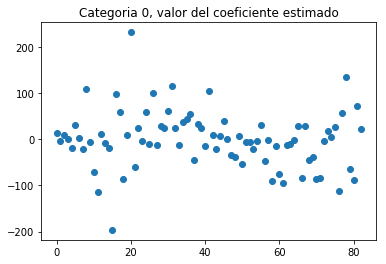

In [13]:
plt.scatter( [i for i in range(83)] ,  final.coef_[0])
plt.title('Categoria 0, valor del coeficiente estimado' )

Text(0.5,1,'Categoria 1,  valor del coeficiente estimado')

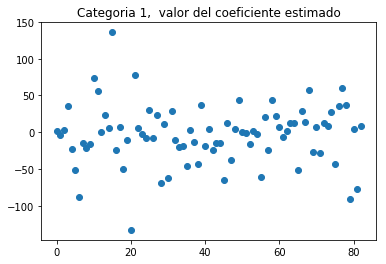

In [14]:
plt.scatter( [i for i in range(83)] ,  final.coef_[1])
plt.title('Categoria 1,  valor del coeficiente estimado' )

Text(0.5,1,'Categoria 2,  valor del coeficiente estimado')

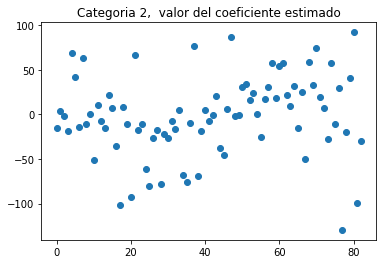

In [15]:
plt.scatter( [i for i in range(83)] ,  final.coef_[2])
plt.title('Categoria 2,  valor del coeficiente estimado' )

Text(0.5,1,'Categoria 3,  valor del coeficiente estimado')

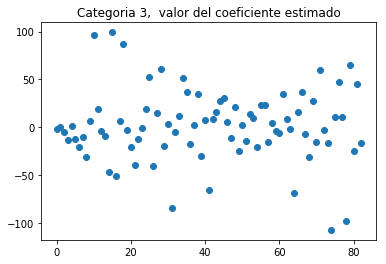

In [16]:
plt.scatter( [i for i in range(83)] ,  final.coef_[3])
plt.title('Categoria 3,  valor del coeficiente estimado'  )